# Generate seurat object


In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import anndata
import os
import sys
from scipy import sparse



sc.settings.verbosity = 1  # verbosity: errors (0), warnings (1), info (2), hints (3)
sys.executable

'/home/jovyan/my-conda-envs/scanpy_1.9.2/bin/python'

## Load data for samples of interest

In [2]:
path_to_data = '/nfs/team292/lg18/endometriosis/integrated_objects/nuclei_immune_integrated.h5ad'
adata = sc.read(path_to_data)
adata.obs.head()

,n_genes,sample,library,StudyName,SampleID,Lane,Processing,Type,BiopsyType,BiopsyType_II,...,Binary Stage,Stage,n_genes_by_counts,total_counts,total_counts_MT,pct_counts_MT,S_score,G2M_score,phase,Nuc_celltype
UA_Endo10281925_AAAGGATAGCTGCGAA,4879,UA_Endo10281925_FX1101,UA_Endo10281925,Marecckovaa,UA_Endo10281925,20.0,Frozen,Nuclei,Superficial,NaN,...,Proliferative,Proliferative,4879,10747.0,9.0,0.083744,0.188576,-0.085329,S,Immune_Myeloid
UA_Endo10281925_AACCATGCACAGAAGC,1856,UA_Endo10281925_FX1101,UA_Endo10281925,Marecckovaa,UA_Endo10281925,20.0,Frozen,Nuclei,Superficial,NaN,...,Proliferative,Proliferative,1856,3004.0,1.0,0.033289,-0.058891,0.014126,G2M,Immune_Lymphoid
UA_Endo10281925_AACCCAAAGCTGAGCA,2116,UA_Endo10281925_FX1101,UA_Endo10281925,Marecckovaa,UA_Endo10281925,20.0,Frozen,Nuclei,Superficial,NaN,...,Proliferative,Proliferative,2116,3306.0,1.0,0.030248,0.073455,0.089245,G2M,Immune_Myeloid
UA_Endo10281925_AACTTCTTCGCAAGAG,3241,UA_Endo10281925_FX1101,UA_Endo10281925,Marecckovaa,UA_Endo10281925,20.0,Frozen,Nuclei,Superficial,NaN,...,Proliferative,Proliferative,3241,6112.0,3.0,0.049084,0.139311,-0.147167,S,Immune_Myeloid
UA_Endo10281925_AAGATAGTCTGGACTA,5214,UA_Endo10281925_FX1101,UA_Endo10281925,Marecckovaa,UA_Endo10281925,20.0,Frozen,Nuclei,Superficial,NaN,...,Proliferative,Proliferative,5214,10745.0,6.0,0.055840,-0.039640,0.616037,G2M,Immune_Myeloid


/tmp/ipykernel_4260/436949090.py:1: DtypeWarning: Columns (11,12,24,47) have mixed types. Specify dtype option on import or set low_memory=False.
  annot_df = pd.read_csv('/nfs/team292/lg18/endometriosis/annotations/nuclei_endometrium_immune.csv',index_col=0)


celltype
Doublet                  6023
eM2                      4960
uNK1                     4659
eM1                      2358
uNK1_cycling             2320
uNK2                     1974
T_cell_CD4               1871
cDC2                     1490
T_cell_CD8               1033
uNK3                      870
eM2_cycling               650
Peripheral_lymphocyte     608
Monocyte                  529
B_cell                    465
cDC1                      443
T_Reg                     256
ILC3                      188
pDC                        93
Plasma_B_cell              53
Name: count, dtype: int64


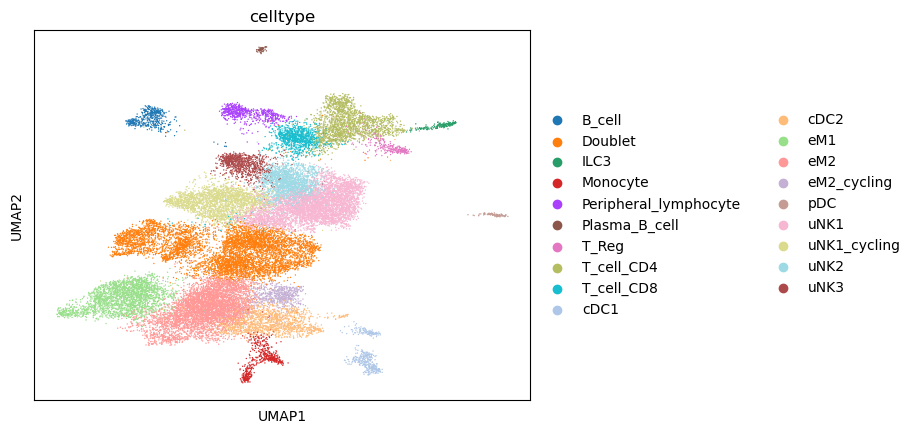

In [4]:
annot_df = pd.read_csv('/nfs/team292/lg18/endometriosis/annotations/nuclei_endometrium_immune.csv',index_col=0)
annot_df.head()
annot = annot_df['celltype'].to_dict()

adata.obs['celltype'] = adata.obs_names.map(annot)
print(adata.obs['celltype'].value_counts())
sc.pl.umap(adata, color=['celltype'])

### Exclude unwanted clusters

In [5]:
adata = adata[[ i not in ['Doublet'] for i in adata.obs['celltype'] ]]
adata = adata[[ 'cycling' not in i for i in adata.obs['celltype'] ]]
print(adata.obs['celltype'].value_counts())

celltype
eM2                      4960
uNK1                     4659
eM1                      2358
uNK2                     1974
T_cell_CD4               1871
cDC2                     1490
T_cell_CD8               1033
uNK3                      870
Peripheral_lymphocyte     608
Monocyte                  529
B_cell                    465
cDC1                      443
T_Reg                     256
ILC3                      188
pDC                        93
Plasma_B_cell              53
Name: count, dtype: int64


### Subset to Ctrl donors in either prolif/secretory phase

In [6]:
adata = adata[[ i in ['Secretory', 'Proliferative'] for i in adata.obs['Binary Stage'] ]]
set(adata.obs['Binary Stage'] )

{'Proliferative', 'Secretory'}

In [7]:
adata = adata[[ i in ['Ctrl_Superficial'] for i in adata.obs['Group'] ]]
set(adata.obs['Group'] )

{'Ctrl_Superficial'}

In [8]:
adata.X.shape

(2952, 33578)

In [9]:
pd.crosstab(adata.obs['Binary Stage'], adata.obs.celltype )

celltype,B_cell,ILC3,Monocyte,Peripheral_lymphocyte,Plasma_B_cell,T_Reg,T_cell_CD4,T_cell_CD8,cDC1,cDC2,eM1,eM2,pDC,uNK1,uNK2,uNK3
Binary Stage,,,,,,,,,,,,,,,,
Proliferative,22,19,60,63,5,16,211,68,29,118,119,283,9,25,67,43
Secretory,7,22,14,15,1,9,29,46,32,122,19,354,7,727,302,89


In [11]:
import pickle

X_scVI = adata.obsm['X_scVI']
fileObj = open('/nfs/team292/lg18/endometriosis/integrated_objects/nuclei_immune_integrated_X_scVI.obj', 'wb')
pickle.dump(X_scVI,fileObj)
fileObj.close()

X_umap = adata.obsm['X_umap']
fileObj = open('/nfs/team292/lg18/endometriosis/integrated_objects/nuclei_immune_integrated_X_umap.obj', 'wb')
pickle.dump(X_umap,fileObj)
fileObj.close()